In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# import data
path = "./Telecom+Customer+Churn/telecom_customer_churn.csv"
cus = pd.read_csv(path)
cus.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [3]:
cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [4]:
path_zip = "./Telecom+Customer+Churn/telecom_zipcode_population.csv"
zip_pop = pd.read_csv(path_zip)
zip_pop.head()

,Zip Code,Population
0,90001,54492
1,90002,44586
2,90003,58198
3,90004,67852
4,90005,43019


In [5]:
# cus description
cus.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


# KPI

In [6]:
# total number of customers
total_num_cus = cus["Customer ID"].unique().shape[0]
print("Total number of customers:", total_num_cus)

# total number of churned customers
churned_num_cus = cus[cus["Customer Status"] == "Churned"]["Customer ID"].unique().shape[0]
print("Total number of churned customers:", churned_num_cus)

# Total renvenue, revenue defined as (Total Charges - Total Refurnds + Total Extra Data Charges + Total Lond Distance Charges)
total_rev = cus["Total Revenue"].sum()
print("Total revenue:", total_rev)

# Revenue of churned customers
churned_rev = cus[cus["Customer Status"] == "Churned"]["Total Revenue"].sum()
print("Revenue of churned customers:", round(churned_rev,2))

# Number of customers who have Unlimited Data
unlimited_data_cus = cus[cus["Unlimited Data"] == "Yes"]["Customer ID"].unique().shape[0]
print("Number of customers who have Unlimited Data:", unlimited_data_cus)

# Average Monthly Charges of all Customers
avg_monthly_charge = cus["Monthly Charge"].mean()
print("Average Monthly Charges:",round(avg_monthly_charge,2))

Total number of customers: 7043
Total number of churned customers: 1869
Total revenue: 21371131.69
Revenue of churned customers: 3684459.82
Number of customers who have Unlimited Data: 4745
Average Monthly Charges: 63.6


# Identify high value customers
based on the following:
1. Revenue 
2. Total charges
3. Tenure in Months, how long the customer has been a customer
4. type of offer the customer has received
5. Unlimited Data plan

<Figure size 720x432 with 0 Axes>

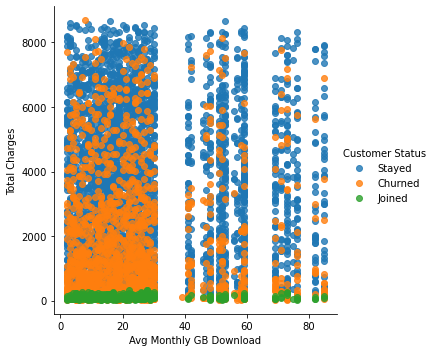

In [7]:
# scatter plot of avg mothly downloads (GB) vs total charges, hue by churn
plt.figure(figsize=(10,6))
sns.lmplot(x="Avg Monthly GB Download", y="Total Charges", data=cus, hue="Customer Status", fit_reg=False)
plt.show()

<Figure size 720x432 with 0 Axes>

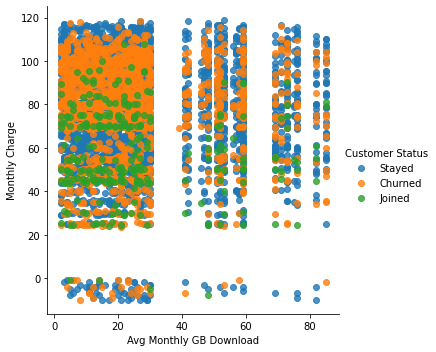

In [40]:
# scatter plot of avg mothly downloads (GB) vs monthly charges, hue by churn
plt.figure(figsize=(10,6))
sns.lmplot(x="Avg Monthly GB Download", y="Monthly Charge", data=cus, hue="Customer Status", fit_reg=False)
plt.show()

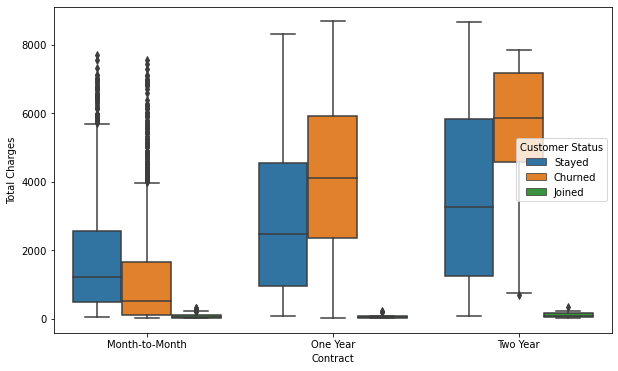

In [8]:
# scatter plot of contract type vs total charges, hue by chrun
plt.figure(figsize=(10, 6))
sns.boxplot(x="Contract", y="Total Charges",hue="Customer Status", data=cus, order=['Month-to-Month', 'One Year', 'Two Year'])
plt.show()

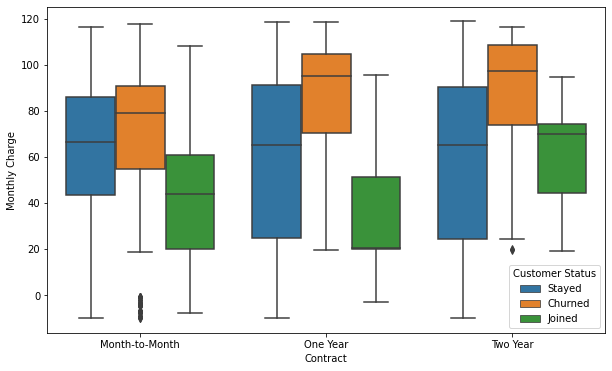

In [41]:
# scatter plot of contract type vs monthly charge, hue by chrun
plt.figure(figsize=(10, 6))
sns.boxplot(x="Contract", y="Monthly Charge",hue="Customer Status", data=cus, order=['Month-to-Month', 'One Year', 'Two Year'])
plt.show()

For any Contract type, Churned customers paid highest monthly charge on average

In [9]:
# take a look at column "Unlimited Data"
cus["Unlimited Data"].describe()


count     5517
unique       2
top        Yes
freq      4745
Name: Unlimited Data, dtype: object

In [10]:
# since not all customer have internet service
# we need a new dataframe to keep only customers with internet service
cus_with_internet = cus[cus["Internet Service"] == "Yes"]
cus_with_internet.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


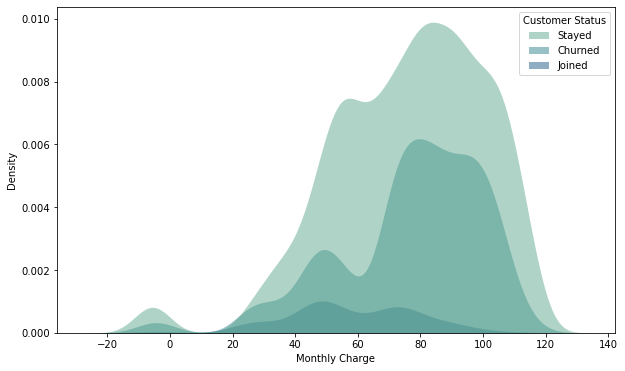

In [11]:
# kde plot of Unlimited Data vs total charges, hue by Customer Status
plt.figure(figsize=(10, 6))
sns.kdeplot(x="Monthly Charge", hue="Customer Status", data=cus_with_internet, 
            fill=True, common_norm=True, palette="crest",alpha=.5, linewidth=0)
plt.show()

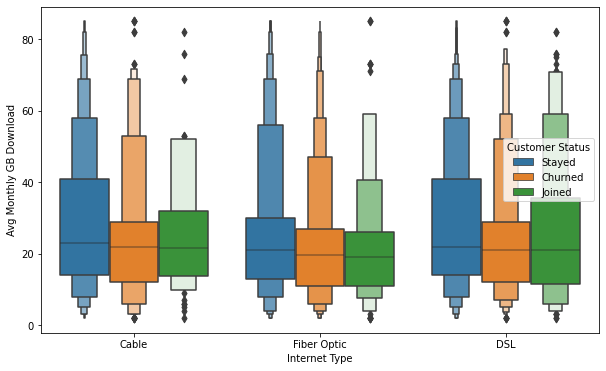

In [12]:
# Toal extra data charge, hue by Customer Status
plt.figure(figsize=(10, 6))
sns.boxenplot(x="Internet Type", y="Avg Monthly GB Download", hue="Customer Status", data=cus_with_internet)
plt.show()

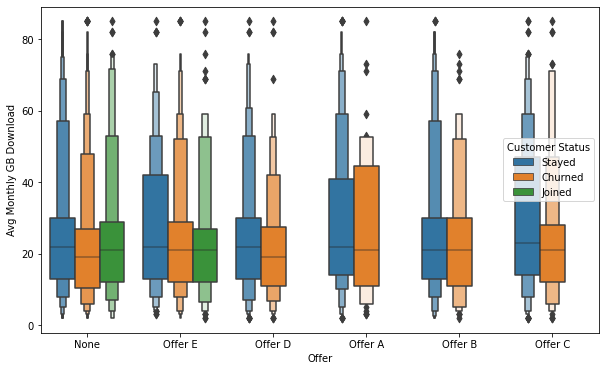

In [31]:
# Toal extra data charge versus offer type, hue by Customer Status
plt.figure(figsize=(10, 6))
sns.boxenplot(x="Offer", y="Avg Monthly GB Download", hue="Customer Status", data=cus_with_internet)
plt.show()

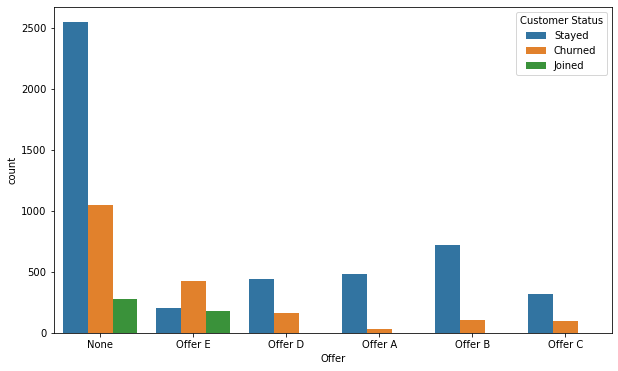

In [13]:
# count plot for offer type, hue by Customer Status
plt.figure(figsize=(10, 6))
sns.countplot(x="Offer", hue="Customer Status", data=cus)
plt.show()

Most of the Customers have Offer E churned, on the other hand Most of the customers have Offer A and B Stayed.

In [14]:
# check uniqe values in column "City"
len(cus["City"].unique().tolist())

1106

In [15]:
# top 5 cities with highest Churn ratio
cus_churned_per_city = cus[cus["Customer Status"] == "Churned"]
cus_churned_per_city = cus_churned_per_city.groupby("City")["Customer ID"].count().reset_index()
print(cus_churned_per_city.sort_values(by="Customer ID", ascending=False).head(5))

              City  Customer ID
597      San Diego          185
390    Los Angeles           78
600  San Francisco           31
604       San Jose           29
230      Fallbrook           26


In [16]:
print(cus.groupby("City").count()["Customer Status"].sort_values(ascending=False).head(10).tolist())

[293, 285, 112, 108, 104, 61, 60, 52, 51, 44]


In [17]:
total_cus_per_city = cus.groupby("City").count()["Customer Status"].reset_index()
total_cus_per_city.shape

(1106, 2)

In [18]:
top_10_cities_cus = total_cus_per_city.sort_values(by="Customer Status", ascending=False).head(10)["City"]
top_10_cities_cus = top_10_cities_cus.tolist()

In [19]:
print(total_cus_per_city.dtypes)
print(cus_churned_per_city.dtypes)

City               object
Customer Status     int64
dtype: object
City           object
Customer ID     int64
dtype: object


In [20]:
percent_churned = total_cus_per_city.merge(cus_churned_per_city,on="City", how="left")
percent_churned.columns = ["City","Total Customers","Churned Customers"]
percent_churned.fillna(0, inplace=True)
percent_churned.head()



,City,Total Customers,Churned Customers
0,Acampo,4,3.0
1,Acton,4,0.0
2,Adelanto,5,1.0
3,Adin,4,2.0
4,Agoura Hills,5,2.0


In [21]:
# calculate churn ratio for each city
# churn ratio = churned customers / total customers
percent_churned["Churn Ratio"] = percent_churned["Churned Customers"] / percent_churned["Total Customers"]
top_10_cities_churn_rate = percent_churned[percent_churned["City"].isin(top_10_cities_cus)].sort_values(by="Churn Ratio", ascending=False)
print(top_10_cities_churn_rate)

              City  Total Customers  Churned Customers  Churn Ratio
854      San Diego              285              185.0     0.649123
306      Escondido               51               16.0     0.313725
857  San Francisco              104               31.0     0.298077
957       Stockton               44               12.0     0.272727
554    Los Angeles              293               78.0     0.266212
863       San Jose              112               29.0     0.258929
548     Long Beach               60               15.0     0.250000
690        Oakland               52               13.0     0.250000
840     Sacramento              108               26.0     0.240741
351         Fresno               61               13.0     0.213115


San Diego is the city with highest Churn rate amoung the top serviced cities

### Most popular internet service add-ons


In [22]:
# group by internet add-ons
add_on_list = ["Online Security","Online Backup",
            "Device Protection Plan","Premium Tech Support",
            "Streaming TV","Streaming Movies","Streaming Music","Unlimited Data"]
add_on = cus[add_on_list]
print(add_on.head())

  Online Security Online Backup Device Protection Plan Premium Tech Support  \
0              No           Yes                     No                  Yes   
1              No            No                     No                   No   
2              No            No                    Yes                   No   
3              No           Yes                    Yes                   No   
4              No            No                     No                  Yes   

  Streaming TV Streaming Movies Streaming Music Unlimited Data  
0          Yes               No              No            Yes  
1           No              Yes             Yes             No  
2           No               No              No            Yes  
3          Yes              Yes              No            Yes  
4          Yes               No              No            Yes  


/var/folders/jd/pyhvlbhj7zq5ljxf6wrlk5xm0000gn/T/ipykernel_11520/212606603.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


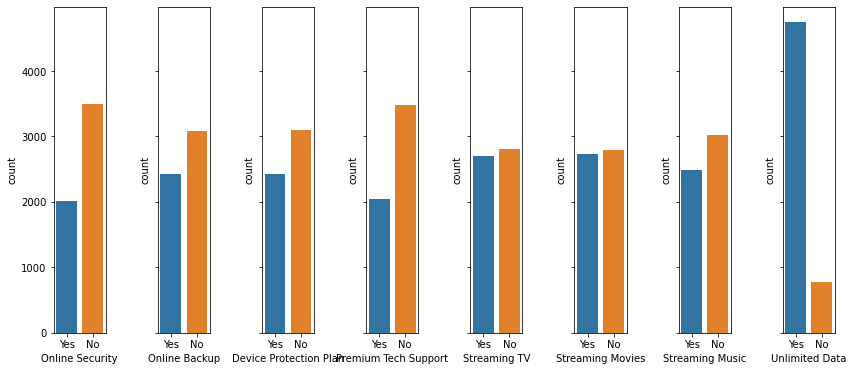

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=8, figsize=(14,6),sharey=True)
fig.subplots_adjust(hspace = .5, wspace=1)

for i in range(8):
    sns.countplot(x = add_on_list[i],data=add_on,ax=axs[i], order=["Yes","No"])
fig.show()

only Unlimited Data have more customers use

In [24]:
# df that contains customers with atleast one additional subscription
add_on_df = cus[(cus["Online Security"]== "Yes") | (cus["Online Backup"]=="Yes")|(cus["Device Protection Plan"]=="Yes")
            |(cus["Premium Tech Support"]=="Yes")|(cus["Streaming TV"]=="Yes")|(cus["Streaming Movies"]=="Yes")
            |(cus["Streaming Music"]=="Yes")|(cus["Unlimited Data"]=="Yes")]
add_on_df.head()


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [25]:
print("number of customers with at least one addtitional internet services:", len(add_on_df))

number of customers with at least one addtitional internet services: 5436


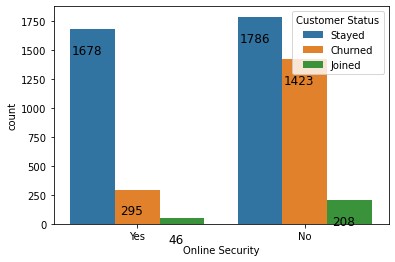

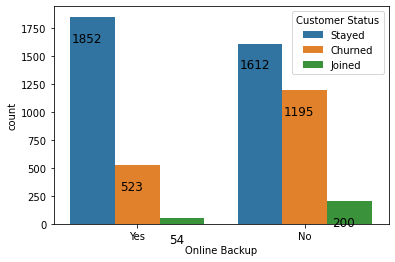

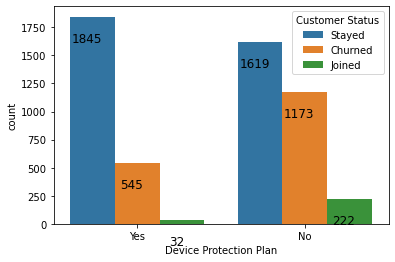

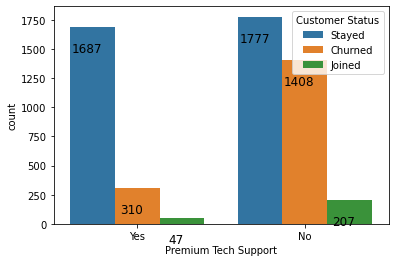

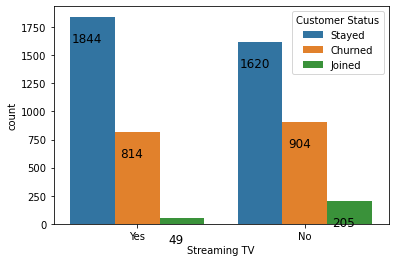

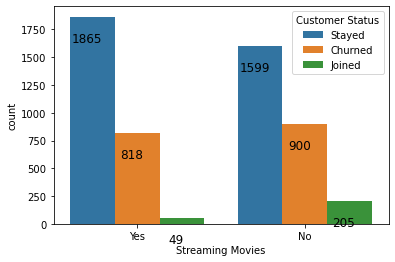

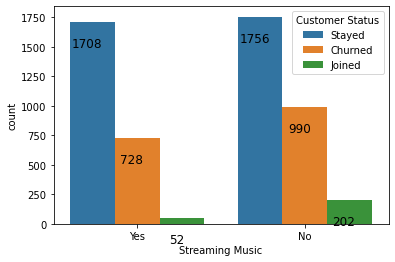

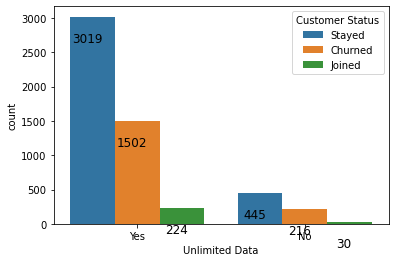

In [38]:
for i in range(len(add_on_list)):
    ax = sns.countplot(data=add_on_df, x=add_on_list[i], hue="Customer Status", order=["Yes","No"])
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.1, p.get_height()-0.5), ha='center', va='top', color='black', size=12)
    plt.show()

Churned ratio of Customers who have joined additional plan:
1. Online Security 17%
1. Online Backup 27%
1. Device Protection Plan 29%
1. Premium Tech Support 18%
1. Streaming TV 43%
1. Streaming Moives 43%
1. Streaming Music 41%
1. Unlimited Data 46%

Customers with Online Security and Premium Tech Support are less likely to Churn compare to those without those services. 

### How many add-ons for Churned customers?
if a customer leave, how many add-ons do they have on average?

In [27]:
# group by customer status == "Churned" 
# Count number of Yes in add_on_list
# compare the number with cusotmers who stayed

cus_churned = cus[cus["Customer Status"]=="Churned"].reset_index()
#cus_churned = cus.groupby("Customer Status")[""].apply(lambda x : (x==))
cus_churned["Count"] = (cus_churned[add_on_list] == "Yes").sum(axis=1)
temp = add_on_list
temp.append("Count")
cus_churned[temp].head()

,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Count
0,No,No,Yes,No,No,No,No,Yes,2
1,No,Yes,Yes,No,Yes,Yes,No,Yes,5
2,No,No,No,Yes,Yes,No,No,Yes,3
3,Yes,No,Yes,No,No,Yes,No,Yes,4
4,No,No,No,No,No,No,No,Yes,1


In [28]:
print(f"Customer who left on average have {round(cus_churned['Count'].mean(),2)} additioanl services")

Customer who left on average have 2.96 additioanl services


In [29]:
add_on_list = ["Online Security","Online Backup",
            "Device Protection Plan","Premium Tech Support",
            "Streaming TV","Streaming Movies","Streaming Music","Unlimited Data"]

In [30]:
# now calculate number of services of customers stayed
cus_stayed = cus[cus["Customer Status"]=="Stayed"].reset_index()
cus_stayed["Count"] = (cus_stayed[add_on_list]== "Yes").sum(axis=1) 
print(f"Customer who Stayed on average have {round(cus_stayed['Count'].mean(),2)} additioanl services")

Customer who Stayed on average have 3.28 additioanl services


### Churned Reason

In [48]:
reason = cus[cus["Customer Status"]== "Churned"].reset_index()
reason.groupby("Churn Category")
reason


,index,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,...,Bank Withdrawal,73.90,280.85,0.0,0,134.60,415.45,Churned,Competitor,Competitor had better devices
1,3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,...,Bank Withdrawal,98.00,1237.85,0.0,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
2,4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,...,Credit Card,83.90,267.40,0.0,0,22.14,289.54,Churned,Dissatisfaction,Network reliability
3,18,0022-TCJCI,Male,79,No,0,Daly City,94015,37.680844,-122.481310,...,Credit Card,62.70,2791.50,0.0,0,480.15,3271.65,Churned,Dissatisfaction,Limited range of services
4,19,0023-HGHWL,Male,67,No,0,Morgan Hill,95037,37.161544,-121.649371,...,Bank Withdrawal,25.10,25.10,0.0,0,0.00,25.10,Churned,Competitor,Competitor made better offer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,7020,9961-JBNMK,Male,79,No,0,Desert Center,92239,33.889605,-115.257009,...,Bank Withdrawal,-1.00,2030.30,10.2,0,887.67,2907.77,Churned,Dissatisfaction,Product dissatisfaction
1865,7023,9965-YOKZB,Male,73,No,0,Grizzly Flats,95636,38.636102,-120.522149,...,Bank Withdrawal,83.85,790.15,0.0,0,90.36,880.51,Churned,Dissatisfaction,Network reliability
1866,7036,9985-MWVIX,Female,53,No,0,Hume,93628,36.807595,-118.901544,...,Credit Card,70.15,70.15,0.0,0,42.09,112.24,Churned,Competitor,Competitor had better devices
1867,7037,9986-BONCE,Female,36,No,0,Fallbrook,92028,33.362575,-117.299644,...,Bank Withdrawal,20.95,85.50,0.0,0,8.04,93.54,Churned,Competitor,Competitor made better offer


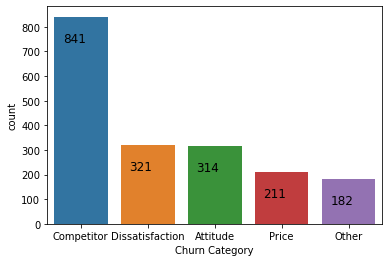

In [64]:
ax = sns.countplot(data= reason, x="Churn Category", order=reason["Churn Category"].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='top', color='black', size=12)
plt.show()

Price is not a moajor factor for customers to leave, however we need more info about Competitor

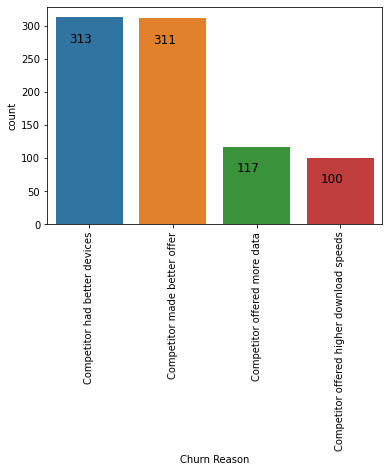

In [63]:
competitor = cus[cus["Churn Category"]=="Competitor"]
ax = sns.countplot(data=competitor, x="Churn Reason", order = competitor["Churn Reason"].value_counts().index)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.3, p.get_height()), ha='center', va='top', color='black', size=12)
plt.xticks(rotation=90)
plt.show()